In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv(r"food_coded.csv")


In [3]:
features = data[['cook','eating_out','employment','ethnic_food','exercise','fav_cuisine_coded','fruit_day','income','on_off_campus','sports','pay_meal_out','veggies_day']]
features.head()

,cook,eating_out,employment,ethnic_food,exercise,fav_cuisine_coded,fruit_day,income,on_off_campus,sports,pay_meal_out,veggies_day
0,2.0,3,3.0,1,1.0,3,5,5.0,1.0,1.0,2,5
1,3.0,2,2.0,4,1.0,1,4,4.0,1.0,1.0,4,4
2,1.0,2,3.0,5,2.0,1,5,6.0,2.0,2.0,3,5
3,2.0,2,3.0,5,3.0,3,4,6.0,1.0,2.0,2,3
4,1.0,2,2.0,4,1.0,1,4,6.0,1.0,1.0,4,4


# CLEANING THE DATASET

In [4]:
#checking whether there are any duplicates
duplicates = features[features.duplicated()]
duplicates
#from the output, it is clear that there are no duplicate rows

,cook,eating_out,employment,ethnic_food,exercise,fav_cuisine_coded,fruit_day,income,on_off_campus,sports,pay_meal_out,veggies_day


In [5]:
#checking for null and missing values
#notnull method returns a dataframe of boolean values
#True --> No null values. False --> null values are there
check_na = features.dropna(axis=0, how='any')
print('There are' ,(len(features) - len(check_na)), 'rows with atleast one column value having a null value.')

There are 25 rows with atleast one column value having a null value.


In [6]:
#Let us remove the null values from the original dataset
features.dropna(axis=0, how='any', inplace=True)
len(features)

C:\Users\RAVI\AppData\Local\Temp\ipykernel_6540\3150841916.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features.dropna(axis=0, how='any', inplace=True)


100

# VISUALIZING THE DATASET

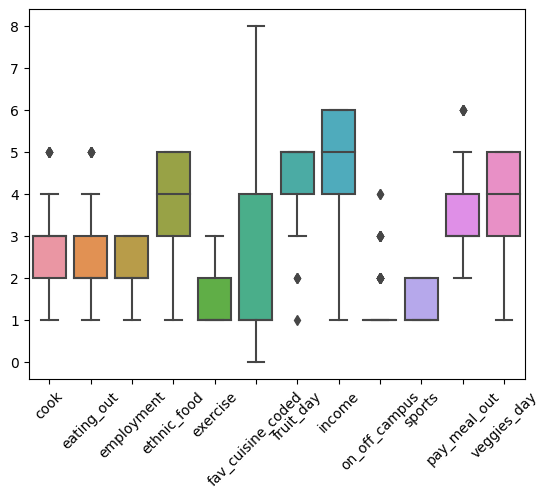

In [7]:
#plotting the dataset in the form of a boxplot
ax=sns.boxplot(data=features)
ax.set_xticklabels(features,rotation=45)
plt.show()

# BUILDING THE KMEANS MODEL FOR THE CODEBOOK DATASET

In [8]:
from sklearn.cluster import KMeans

C:\Users\RAVI\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\RAVI\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\RAVI\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\RAVI

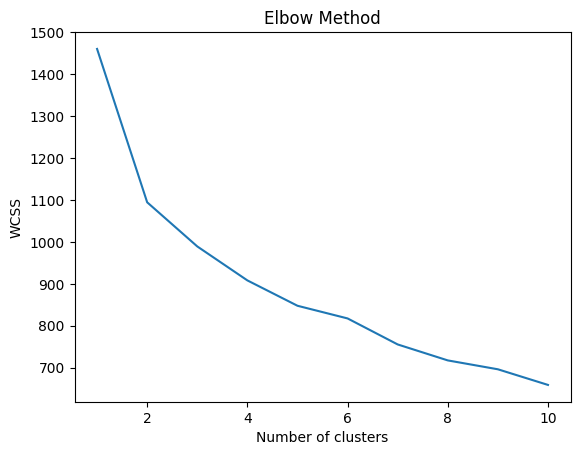

In [9]:
wcss = []
for i in range(1,11):
    Classifier = KMeans(n_clusters=i)
    Classifier.fit(features)
    wcss.append(Classifier.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# From the Graph, it seems K=8 might be optimal

In [10]:
Classifier = KMeans(n_clusters=6).fit(features)
y_pred = Classifier.fit_predict(features)

C:\Users\RAVI\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\RAVI\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


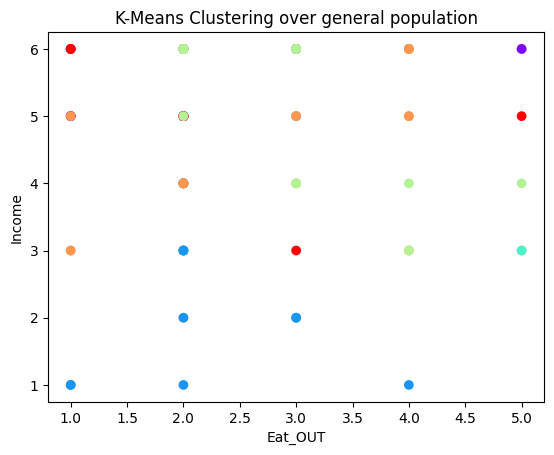

In [11]:
plt.scatter(features['eating_out'], features['income'], c=y_pred, cmap='rainbow')
plt.title('K-Means Clustering over general population')
plt.ylabel('Income')
plt.xlabel('Eat_OUT')
plt.show()

In [12]:
import json  
import pandas as pd  
from pandas.io.json import json_normalize  
import requests
from tabulate import tabulate
from sklearn.cluster import KMeans
import random
import numpy as np
import pandas as pd
import folium
import warnings
warnings.filterwarnings('ignore')
import os
os.environ.keys()

KeysView(environ({'ACSETUPSVCPORT': '23210', 'ACSVCPORT': '17532', 'ALLUSERSPROFILE': 'C:\\ProgramData', 'APPDATA': 'C:\\Users\\RAVI\\AppData\\Roaming', 'APPLICATION_INSIGHTS_NO_DIAGNOSTIC_CHANNEL': '1', 'CHROME_CRASHPAD_PIPE_NAME': '\\\\.\\pipe\\LOCAL\\crashpad_3584_IRUSZGIYATXAAGFO', 'COMMONPROGRAMFILES': 'C:\\Program Files\\Common Files', 'COMMONPROGRAMFILES(X86)': 'C:\\Program Files (x86)\\Common Files', 'COMMONPROGRAMW6432': 'C:\\Program Files\\Common Files', 'COMPUTERNAME': 'RAVI01', 'COMSPEC': 'C:\\WINDOWS\\system32\\cmd.exe', 'DRIVERDATA': 'C:\\Windows\\System32\\Drivers\\DriverData', 'ELECTRON_RUN_AS_NODE': '1', 'HOMEDRIVE': 'C:', 'HOMEPATH': '\\Users\\RAVI', 'JPY_INTERRUPT_EVENT': '3892', 'LOCALAPPDATA': 'C:\\Users\\RAVI\\AppData\\Local', 'LOGONSERVER': '\\\\RAVI01', 'NUMBER_OF_PROCESSORS': '8', 'ONEDRIVE': 'C:\\Users\\RAVI\\OneDrive', 'ORIGINAL_XDG_CURRENT_DESKTOP': 'undefined', 'OS': 'Windows_NT', 'PATH': 'c:\\Users\\RAVI\\AppData\\Local\\Microsoft\\WindowsApps;c:\\Users\\R

In [13]:

url = 'https://discover.search.hereapi.com/v1/discover?in=circle:17.320486,76.839752;r=100000&q=hostel&apiKey=uJHMEjeagmFGldXp661-pDMf4R-PxvWIu7I68UjYC5Q'
data = requests.get(url).json()
d=json_normalize(data['items'])
d.to_csv('api-data/hostel.csv')
d 

,title,id,language,ontologyId,resultType,access,distance,categories,address.label,address.countryCode,...,address.state,address.county,address.city,address.district,address.postalCode,position.lat,position.lng,address.street,references,address.subdistrict
0,Government Polytechnic Hostel,here:pds:place:356tends-465fb1165dfc45cc82c17b...,en,here:cm:ontology:hostel,place,"[{'lat': 17.31841, 'lng': 76.83619}]",470,"[{'id': '500-5100-0055', 'name': 'Hostel', 'pr...","Government Polytechnic Hostel, Shambhognlli, K...",IND,...,Karnataka,Kalaburagi,Kalaburagi,Shambhognlli,585106,17.31842,76.83589,NaN,NaN,NaN
1,Government Bed College Hostel,here:pds:place:356tends-3dd57a17fb0349049366b4...,en,here:cm:ontology:hostel,place,"[{'lat': 17.31773, 'lng': 76.83619}]",514,"[{'id': '500-5100-0055', 'name': 'Hostel', 'pr...","Government Bed College Hostel, Rajapur Road, S...",IND,...,Karnataka,Kalaburagi,Kalaburagi,Shambhognlli,585106,17.31775,76.83585,Rajapur Road,NaN,NaN
2,Government Hostel,here:pds:place:356tends-f0e5e6d9ab2199b8193c3d...,en,here:cm:ontology:hostel,place,"[{'lat': 17.31568, 'lng': 76.83645}]",630,"[{'id': '500-5100-0055', 'name': 'Hostel', 'pr...","Government Hostel, Shambhognlli, Kalaburagi 58...",IND,...,Karnataka,Kalaburagi,Kalaburagi,Shambhognlli,585106,17.31568,76.83662,NaN,NaN,NaN
3,Government Polytechnic Girls Hostel,here:pds:place:356tends-80b664ef43fb4caa9a4a38...,en,here:cm:ontology:hostel,place,"[{'lat': 17.31643, 'lng': 76.83493}]",672,"[{'id': '500-5100-0055', 'name': 'Hostel', 'pr...","Government Polytechnic Girls Hostel, Shambhogn...",IND,...,Karnataka,Kalaburagi,Kalaburagi,Shambhognlli,585106,17.31645,76.83504,NaN,NaN,NaN
4,Lamanl Vidyavathi Hostel,here:pds:place:356tends-aa15d1627e7e4eb68fb685...,en,here:cm:ontology:hostel,place,"[{'lat': 17.32016, 'lng': 76.83228}]",793,"[{'id': '500-5100-0055', 'name': 'Hostel', 'pr...","Lamanl Vidyavathi Hostel, Shambhognlli, Kalabu...",IND,...,Karnataka,Kalaburagi,Kalaburagi,Shambhognlli,585106,17.32051,76.83228,NaN,NaN,NaN
5,Asian Mall VG Hostel,here:pds:place:356tends-c2c3bad18fc04708a127f1...,en,here:cm:ontology:hostel,place,"[{'lat': 17.32674, 'lng': 76.83487}]",826,"[{'id': '500-5100-0055', 'name': 'Hostel', 'pr...","Asian Mall VG Hostel, SP Office Road, Rajapur,...",IND,...,Karnataka,Kalaburagi,Kalaburagi,Rajapur,585106,17.32652,76.83521,SP Office Road,NaN,NaN
6,Al-Badar Girls Hostel,here:pds:place:356tends-639535f6116b4ee10ed866...,en,here:cm:ontology:hostel,place,"[{'lat': 17.31852, 'lng': 76.8319}]",838,"[{'id': '500-5100-0055', 'name': 'Hostel', 'pr...","Al-Badar Girls Hostel, Shambhognlli, Kalaburag...",IND,...,Karnataka,Kalaburagi,Kalaburagi,Shambhognlli,585106,17.31867,76.83209,NaN,NaN,NaN
7,B C M Hostel,here:pds:place:356tends-cd70041ce97c45148983ef...,en,here:cm:ontology:hostel,place,"[{'lat': 17.31655, 'lng': 76.83298}]",858,"[{'id': '500-5100-0055', 'name': 'Hostel', 'pr...","B C M Hostel, Aiwan E Shahi Road, Shambhognlli...",IND,...,Karnataka,Kalaburagi,Kalaburagi,Shambhognlli,585106,17.31648,76.83284,Aiwan E Shahi Road,NaN,NaN
8,H. K. E. Societys V. G. Women's Medical Colleg...,here:pds:place:356jx7ps-664ab82e2d27068b6f112e...,en-GB,here:cm:ontology:hostel,place,"[{'lat': 17.32696, 'lng': 76.83502}]",862,"[{'id': '500-5100-0055', 'name': 'Hostel', 'pr...",H. K. E. Societys V. G. Women's Medical Colleg...,IND,...,Karnataka,Kalaburagi,Kalaburagi,Rajapur,585106,17.32688,76.83516,SP Office Road,"[{'supplier': {'id': 'core'}, 'id': '113614380...",NaN
9,Prakruthi Chatama Hostel,here:pds:place:356tends-9df87b7957f747aabb5058...,en,here:cm:ontology:hostel,place,"[{'lat': 17.31935, 'lng': 76.84815}]",882,"[{'id': '500-5100-0055', 'name': 'Hostel', 'pr...","Prakruthi Chatama Hostel, Shahabad Road, Rajap...",IND,...,Karnataka,Kalaburagi,Kalaburagi,Rajapur,585106,17.31931,76.84797,Shahabad Road,NaN,NaN


In [14]:
d.columns

Index(['title', 'id', 'language', 'ontologyId', 'resultType', 'access',
       'distance', 'categories', 'address.label', 'address.countryCode',
       'address.countryName', 'address.stateCode', 'address.state',
       'address.county', 'address.city', 'address.district',
       'address.postalCode', 'position.lat', 'position.lng', 'address.street',
       'references', 'address.subdistrict'],
      dtype='object')

In [15]:
#Cleaning API data
d2=d[['title','address.label','distance','access','position.lat','position.lng','address.postalCode','id']]
d2.to_csv('api-data/cleaned_apartment.csv')
d2

,title,address.label,distance,access,position.lat,position.lng,address.postalCode,id
0,Government Polytechnic Hostel,"Government Polytechnic Hostel, Shambhognlli, K...",470,"[{'lat': 17.31841, 'lng': 76.83619}]",17.31842,76.83589,585106,here:pds:place:356tends-465fb1165dfc45cc82c17b...
1,Government Bed College Hostel,"Government Bed College Hostel, Rajapur Road, S...",514,"[{'lat': 17.31773, 'lng': 76.83619}]",17.31775,76.83585,585106,here:pds:place:356tends-3dd57a17fb0349049366b4...
2,Government Hostel,"Government Hostel, Shambhognlli, Kalaburagi 58...",630,"[{'lat': 17.31568, 'lng': 76.83645}]",17.31568,76.83662,585106,here:pds:place:356tends-f0e5e6d9ab2199b8193c3d...
3,Government Polytechnic Girls Hostel,"Government Polytechnic Girls Hostel, Shambhogn...",672,"[{'lat': 17.31643, 'lng': 76.83493}]",17.31645,76.83504,585106,here:pds:place:356tends-80b664ef43fb4caa9a4a38...
4,Lamanl Vidyavathi Hostel,"Lamanl Vidyavathi Hostel, Shambhognlli, Kalabu...",793,"[{'lat': 17.32016, 'lng': 76.83228}]",17.32051,76.83228,585106,here:pds:place:356tends-aa15d1627e7e4eb68fb685...
5,Asian Mall VG Hostel,"Asian Mall VG Hostel, SP Office Road, Rajapur,...",826,"[{'lat': 17.32674, 'lng': 76.83487}]",17.32652,76.83521,585106,here:pds:place:356tends-c2c3bad18fc04708a127f1...
6,Al-Badar Girls Hostel,"Al-Badar Girls Hostel, Shambhognlli, Kalaburag...",838,"[{'lat': 17.31852, 'lng': 76.8319}]",17.31867,76.83209,585106,here:pds:place:356tends-639535f6116b4ee10ed866...
7,B C M Hostel,"B C M Hostel, Aiwan E Shahi Road, Shambhognlli...",858,"[{'lat': 17.31655, 'lng': 76.83298}]",17.31648,76.83284,585106,here:pds:place:356tends-cd70041ce97c45148983ef...
8,H. K. E. Societys V. G. Women's Medical Colleg...,H. K. E. Societys V. G. Women's Medical Colleg...,862,"[{'lat': 17.32696, 'lng': 76.83502}]",17.32688,76.83516,585106,here:pds:place:356jx7ps-664ab82e2d27068b6f112e...
9,Prakruthi Chatama Hostel,"Prakruthi Chatama Hostel, Shahabad Road, Rajap...",882,"[{'lat': 17.31935, 'lng': 76.84815}]",17.31931,76.84797,585106,here:pds:place:356tends-9df87b7957f747aabb5058...


In [17]:

df_final=d2[['position.lat','position.lng']]

librayList=[]
latitudes = list(d2['position.lat'])
longitudes = list( d2['position.lng'])
for lat, lng in zip(latitudes, longitudes):    
    radius = '10000' #Set the radius to 1000 metres
    latitude=lat
    longitude=lng
    
	
    search_query = 'hostel' #Search for any libray
    url = 'https://discover.search.hereapi.com/v1/discover?in=circle:{},{};r={}&q={}&apiKey=uJHMEjeagmFGldXp661-pDMf4R-PxvWIu7I68UjYC5Q'.format(latitude, longitude, radius, search_query)
    results = requests.get(url).json()
    venues=json_normalize(results['items'])
    librayList.append(venues['title'].count())



df_final['hostel'] = librayList

df_final

,position.lat,position.lng,hostel
0,17.31842,76.83589,20
1,17.31775,76.83585,20
2,17.31568,76.83662,20
3,17.31645,76.83504,20
4,17.32051,76.83228,20
5,17.32652,76.83521,20
6,17.31867,76.83209,20
7,17.31648,76.83284,20
8,17.32688,76.83516,20
9,17.31931,76.84797,20


In [18]:
#Run K-means clustering on dataframe
kclusters = 1

kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(df_final)
df_final['Cluster']=kmeans.labels_
df_final['Cluster']=df_final['Cluster'].apply(str)
df_final

,position.lat,position.lng,hostel,Cluster
0,17.31842,76.83589,20,0
1,17.31775,76.83585,20,0
2,17.31568,76.83662,20,0
3,17.31645,76.83504,20,0
4,17.32051,76.83228,20,0
5,17.32652,76.83521,20,0
6,17.31867,76.83209,20,0
7,17.31648,76.83284,20,0
8,17.32688,76.83516,20,0
9,17.31931,76.84797,20,0


In [19]:
#Plotting clustered locations on map using Folium

#define coordinates of the college
map_bom=folium.Map(location=[17.320486,76.839752],zoom_start=12)

# instantiate a feature group for the incidents in the dataframe
locations = folium.map.FeatureGroup()

# set color scheme for the clusters
def color_producer(cluster):
    if cluster=='0':
        return 'red'
    elif cluster=='1':
        return 'orange'
    else:
        return 'red'

latitudes = list(df_final['position.lat'])
longitudes = list(df_final['position.lng'])
labels = list(df_final['Cluster'])
names=list(d2['title'])
for lat, lng, label,names in zip(latitudes, longitudes, labels,names):
    folium.CircleMarker(
            [lat,lng],
            fill=True,
            fill_opacity=1,
            popup=folium.Popup(names, max_width = 300),
            radius=20,
            color=color_producer(label)
        ).add_to(map_bom)

# add locations to map
map_bom.add_child(locations)
folium.Marker([17.320486,76.839752],popup='CURRENT CO-ORDINATE',zoom_start=50).add_to(map_bom)

In [20]:
#saving the map 
map_bom.save("map/hostel.html")